In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
# Configuring default setting to display all the rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
# loading dataset
transaction = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', header=1)
demographic = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', header=1)
address = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', header=1)
New_customer = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='NewCustomerList', header=1)

In [4]:
# visualise data set
transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
# visualise data set
demographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
# visualise data set
address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
# visualise data set
New_customer.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


## Merging all 3 dataset into one

In [8]:
df = pd.merge(demographic, transaction, how='inner', on='customer_id')
df = pd.merge(df, address, how= 'inner', on='customer_id')
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,94,86,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,060 Morning Avenue,2016,New South Wales,Australia,10
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,3765,38,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,060 Morning Avenue,2016,New South Wales,Australia,10
2,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,5157,47,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,060 Morning Avenue,2016,New South Wales,Australia,10
3,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,9785,72,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,060 Morning Avenue,2016,New South Wales,Australia,10
4,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,13424,2,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,060 Morning Avenue,2016,New South Wales,Australia,10


## Independent and dependent variables

In [9]:
# Separating target variable from independent variable  
target_columns = [var for var in df.columns if var not in New_customer.columns]
target_columns

['customer_id',
 'default',
 'transaction_id',
 'product_id',
 'transaction_date',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'product_first_sold_date']

In [10]:
# independent variables 
independent_attribute = [var for var in df.columns if var not in target_columns]
independent_attribute

['first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation']

## Missing values imputation

In [11]:
# Percentage of missing values in the independent variables 
df[independent_attribute].isnull().mean()*100

first_name                              0.000000
last_name                               3.215144
gender                                  0.000000
past_3_years_bike_related_purchases     0.000000
DOB                                     2.233574
job_title                              11.914062
job_industry_category                  16.135817
wealth_segment                          0.000000
deceased_indicator                      0.000000
owns_car                                0.000000
tenure                                  2.233574
address                                 0.000000
postcode                                0.000000
state                                   0.000000
country                                 0.000000
property_valuation                      0.000000
dtype: float64

In [12]:
missing_values = [var for var in independent_attribute if df[var].isnull().any()]
missing_values

['last_name', 'DOB', 'job_title', 'job_industry_category', 'tenure']

The missing values in the above variables can be imputed as they are independent variables.   
Let's see the correlation among independent varaibles containing missing values

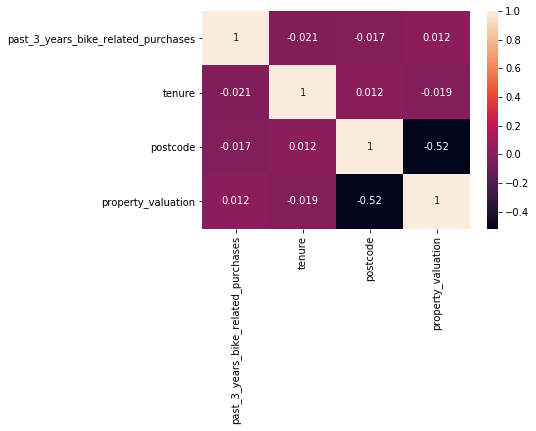

In [13]:
sns.heatmap(df[independent_attribute].corr(), annot=True)

We not able to find any correlation between tenure columns and other independent columns.  
Let's feature extract age from DOB columns to see any casual relationship

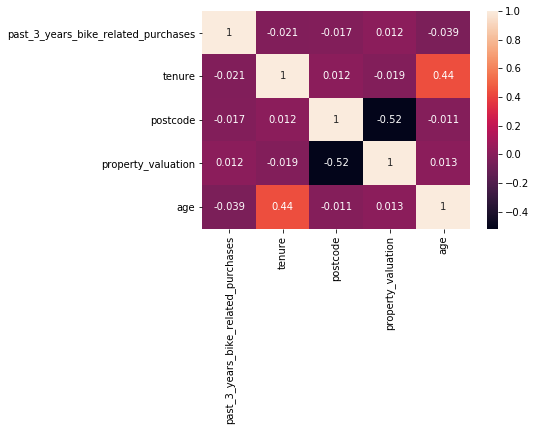

In [14]:
df['birth_year'] = pd.DatetimeIndex(df.DOB).year
df['age'] = 2020-df['birth_year']
independent_attribute.append('age')
sns.heatmap(df[independent_attribute].corr(), annot=True)

We can see some relation between age and tenure

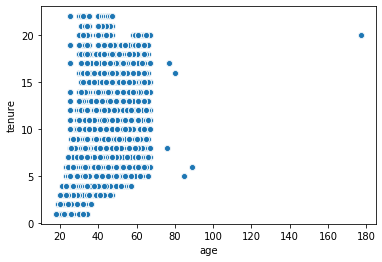

In [15]:
sns.scatterplot(df.age, df.tenure)

In [16]:
print('No of records missing in tenure',df[df.tenure.isnull()].shape[0])
print('No of records missing in age',df[df.age.isnull()].shape[0])
print('No of records missing in both age and tenure',df[df.tenure.isnull() & df.age.isnull()].shape[0])

No of records missing in tenure 446
No of records missing in age 446
No of records missing in both age and tenure 446


In [17]:
# replacing missing values in age and tenure columns with 0
def fill_num(data, list):
    for var in list:
        data[var] = data[var].fillna(0)
        
fill_num(df, ['tenure', 'age'])

Since the percentage of missing data is high in columns job_title and job_industry_category. So we have to put an indicator of missing values so that we can preserve valuable information. 

In [18]:
# replacing missing values in job_title and job_industry_category columns with 'missing' label
def fill_cat(data, list):
    for var in list:
        data[var] = data[var].fillna('missing')
        
fill_cat(df, ['job_title', 'job_industry_category'])

In [19]:
# Percentage of missing values in the target variables 
df[target_columns].isnull().mean()*100

customer_id                0.000000
default                    7.266627
transaction_id             0.000000
product_id                 0.000000
transaction_date           0.000000
online_order               1.797877
order_status               0.000000
brand                      0.976562
product_line               0.976562
product_class              0.976562
product_size               0.976562
list_price                 0.000000
standard_cost              0.976562
product_first_sold_date    0.976562
dtype: float64

Now before deleting the records having missing values. We have to drop out default column because:  
1. The values are un explainable
2. The missing values contained is 7.27 percentage which is greater than missing data percentage present in DOB column.

In [20]:
df.drop('default', axis=1, inplace=True)
target_columns = target_columns[2:]
df.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'transaction_id', 'product_id',
       'transaction_date', 'online_order', 'order_status', 'brand',
       'product_line', 'product_class', 'product_size', 'list_price',
       'standard_cost', 'product_first_sold_date', 'address', 'postcode',
       'state', 'country', 'property_valuation', 'birth_year', 'age'],
      dtype='object')

In [21]:
# Droping records which is having missing values in target variables
df = df.dropna(axis=0, subset=target_columns)
df[target_columns].isnull().any()

transaction_id             False
product_id                 False
transaction_date           False
online_order               False
order_status               False
brand                      False
product_line               False
product_class              False
product_size               False
list_price                 False
standard_cost              False
product_first_sold_date    False
dtype: bool

## Feature engineering some of the target columns

In [45]:
target_columns = target_columns[2:]
target_columns

['transaction_date',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'product_first_sold_date']

In [56]:
df['year'] = pd.DatetimeIndex(df.transaction_date).year
df['month'] = pd.DatetimeIndex(df.transaction_date).month
df['weekday'] = pd.DatetimeIndex(df.transaction_date).weekday

for var in ['year', 'month', 'weekday']:
    target_columns.append(var)
    
df[target_columns].head()

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,year,month,weekday
0,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,38482.0,2017,12,5
1,2017-04-06,1.0,Approved,Solex,Standard,medium,medium,1577.53,826.51,39526.0,2017,4,3
2,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,37823.0,2017,5,3
3,2017-01-05,0.0,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,37873.0,2017,1,3
4,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,38573.0,2017,2,1


In [58]:
for var in ['year', 'month', 'weekday']:
    print(var, df[var].unique())

year [2017]
month [12  4  5  1  2  3  6  8  9 10  7 11]
weekday [5 3 1 4 0 6 2]


## Independent Numeric variables

In [24]:
num_indp_var = [var for var in independent_attribute if df[var].dtypes != 'object']
num_indp_var

['past_3_years_bike_related_purchases',
 'DOB',
 'tenure',
 'postcode',
 'property_valuation',
 'age']

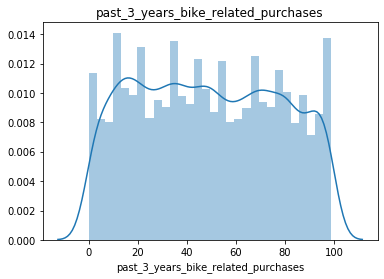

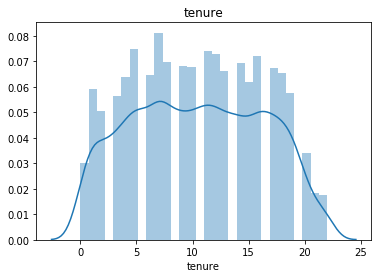

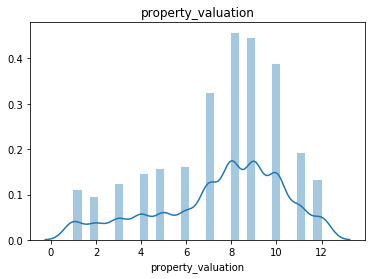

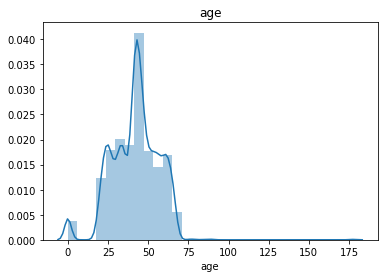

In [29]:
# Distribution of numeric varaibles 
for var in ['past_3_years_bike_related_purchases', 'tenure', 'property_valuation', 'age']:
    sns.distplot(df[var], bins=30)
    plt.title(var)
    plt.show()

* property_valuation distribution is slightly negative skewed
* We have an outlier in age column and the distribution is positive skewed

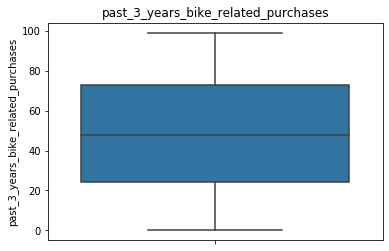

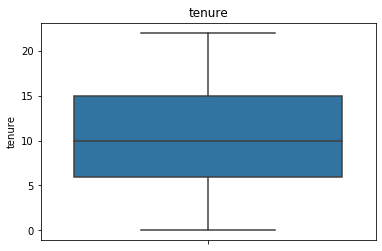

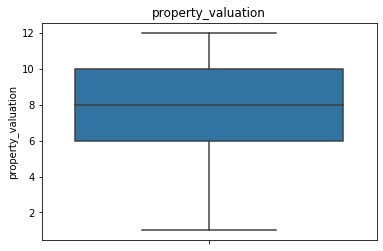

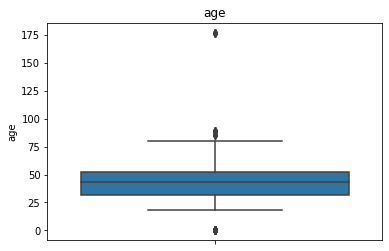

In [31]:
# Boxplot of numeric varaibles 
for var in ['past_3_years_bike_related_purchases', 'tenure', 'property_valuation', 'age']:
    sns.boxplot(y = df[var])
    plt.title(var)
    plt.show()

As aspected, age column is showing an outlier.  
Need to deal with an outlier

In [40]:
df[df.age > 100]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,transaction_id,product_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,address,postcode,state,country,property_valuation,birth_year,age
171,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,1039,8,2017-07-01,1.0,Approved,Solex,Road,medium,small,1703.52,1516.13,40649.0,833 Luster Way,4005,QLD,Australia,8,1843.0,177.0
172,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,1107,15,2017-08-22,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,38693.0,833 Luster Way,4005,QLD,Australia,8,1843.0,177.0
173,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,2638,83,2017-04-07,0.0,Approved,Solex,Touring,medium,large,2083.94,675.03,41533.0,833 Luster Way,4005,QLD,Australia,8,1843.0,177.0
174,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,9044,12,2017-02-13,0.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,38216.0,833 Luster Way,4005,QLD,Australia,8,1843.0,177.0
175,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,9792,60,2017-06-25,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,40779.0,833 Luster Way,4005,QLD,Australia,8,1843.0,177.0
176,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,12083,13,2017-07-23,0.0,Approved,Solex,Standard,medium,medium,1163.89,589.27,42560.0,833 Luster Way,4005,QLD,Australia,8,1843.0,177.0
178,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,17808,96,2017-04-10,1.0,Approved,WeareA2B,Road,low,small,1172.78,1043.77,37539.0,833 Luster Way,4005,QLD,Australia,8,1843.0,177.0
179,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,19291,65,2017-09-19,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,42145.0,833 Luster Way,4005,QLD,Australia,8,1843.0,177.0


In [36]:
df.groupby('property_valuation')['age'].mean()

property_valuation
1     42.402299
2     41.343844
3     41.308219
4     42.092308
5     41.359206
6     40.784588
7     41.792535
8     42.178154
9     42.970069
10    40.887722
11    43.342105
12    41.795551
Name: age, dtype: float64

In [37]:
age = df.groupby('property_valuation')['age'].mean()[8].round()
age

42.0

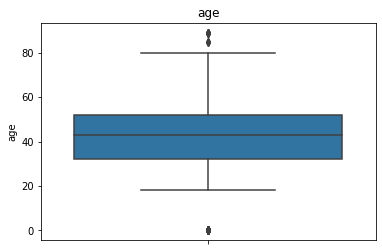

In [42]:
df['age'] = np.where(df['age'] == 177, age, df['age'])
sns.boxplot(y = df['age'])
plt.title('age')
plt.show()

In [43]:
target_columns

['transaction_id',
 'product_id',
 'transaction_date',
 'online_order',
 'order_status',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'list_price',
 'standard_cost',
 'product_first_sold_date']

## Independent categorical  variables

In [26]:
cat_indp_var = [var for var in independent_attribute if df[var].dtypes == 'object']
cat_indp_var

['first_name',
 'last_name',
 'gender',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'address',
 'state',
 'country']